## Importación de librerías

In [ ]:
# Incorporamos los nombres al dataset, pues no se incluyen
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerías de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Explorado el dataset

In [ ]:
# hay 60 000 imágenes en el training dataset
print(train_images.shape)
#> (60000, 28, 28)
print(len(train_labels))
#> 60000

In [ ]:
# cada etiqueta es un número entre 0 y 9
print(train_labels)
#> [9, 0, 0, ..., 3, 0, 5]

In [ ]:
# hay 10 000 imágenes en el test dataset
print(test_images.shape)
#> (10000, 28, 28)
print(len(test_labels))
#> 10000

## Ver primer elemento

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Ver primeros 25 elementos

In [ ]:
# normalizamos
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

## Modelo

In [ ]:
# Creamos el modelo:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [25]:
# Compilamos el modelo:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [26]:
# Entrenamos el modelo:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2300 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2215 - accuracy: 0.9178
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2166 - accuracy: 0.9191
Epoch 4/10
1875/1875 [==============================] - 2s 995us/step - loss: 0.2092 - accuracy: 0.9210
Epoch 5/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.2042 - accuracy: 0.9232
Epoch 6/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.1975 - accuracy: 0.9257
Epoch 7/10
1875/1875 [==============================] - 2s 982us/step - loss: 0.1910 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.1878 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1811 - accuracy: 0.9322
Epoch 10/10
1875/1875 [==============================] - 2s 994us/step -

In [27]:
# Evaluamos exactitud:
###IMPORTANTE: LOS RESULTADOS DE LA EVALUACION CON EL SET DE TEST SON MENORES QUE CON EL SET DE ENTRENAMIENTO 
###POR LO CUAL SE CONCLUYE QUE HAY UN LIGERO SOBREAJUSTE
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose=2)
print("\nTest accuracy:", test_acc)
#> Test accuracy: 0.8848999738693237

313/313 - 0s - loss: 0.3493 - accuracy: 0.8859 - 273ms/epoch - 872us/step

Test accuracy: 0.8859000205993652


In [30]:
# Realizamos predicciones, mostrando la predicción sobre el primer elemento
predictions = model.predict(test_images)

In [31]:
# mostramos las 10 probabilidades PARA EL PRIMER ELEMENTO
print(predictions[0])

[1.2499306e-07 3.4706008e-10 7.3163253e-11 2.2159741e-11 2.7371447e-08
 1.6085291e-06 2.2732916e-09 5.0156885e-03 5.5023776e-12 9.9498248e-01]


In [32]:
# nos quedamos con la más elevada  ###SERIA LA CLASE ANKLE_BOOT
print(np.argmax(predictions[0]))

9


## Predicciones en forma grafica

In [36]:
# Mostremos de forma gráfica todo el conjunto de las predicciones de las 10 clases
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)

In [37]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

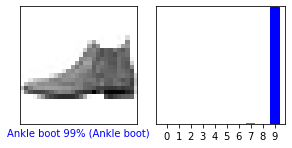

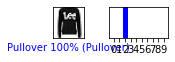

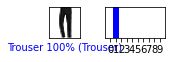

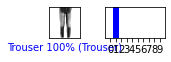

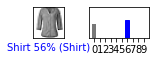

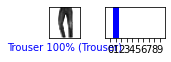

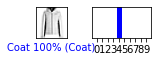

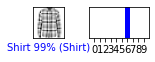

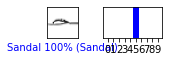

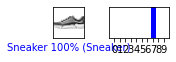

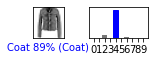

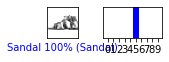

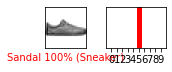

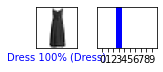

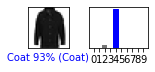

In [38]:
# Mostraremos las primeras 15 imágenes de test con sus predicciones y sus etiquetas reales
# En azul las predicciones correctas y en rojo las incorrectas
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()